In [2]:
pip install numpy pandas matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [7]:
%store -r df_clean
cleaned_df = df_clean
cleaned_df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
print("Everything Set")

Everything Set


Churn distribution (counts):
 Churn
0    5174
1    1869
Name: count, dtype: int64

Churn distribution (%):
 Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22636\2675787799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', palette=['black', 'green'], data=cleaned_df)


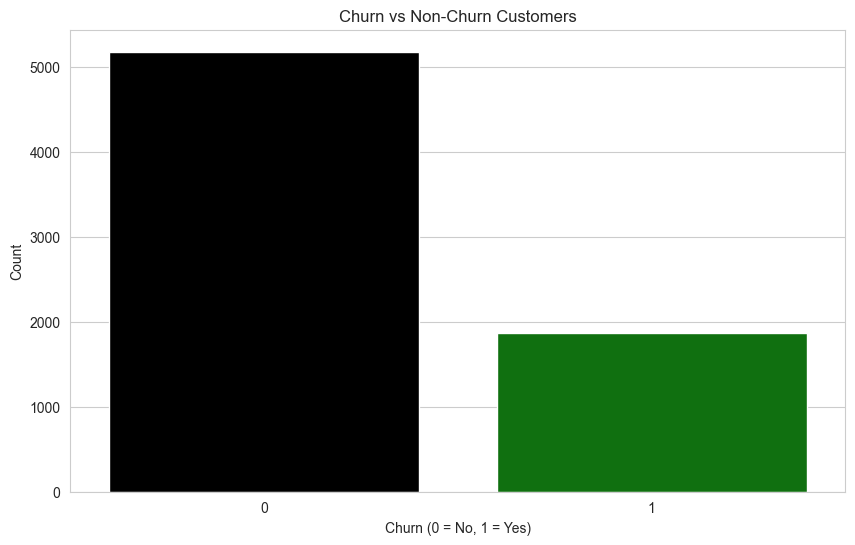

In [10]:
#Creating A Countplot of the Churn Values
churn_counts = cleaned_df['Churn'].value_counts()
churn_percent = cleaned_df['Churn'].value_counts(normalize=True) * 100

print("Churn distribution (counts):\n", churn_counts)
print("\nChurn distribution (%):\n", churn_percent)

sns.countplot(x='Churn', palette=['black', 'green'], data=cleaned_df)
plt.title("Churn vs Non-Churn Customers")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
#plt.axis("off")
plt.show()

* This Indicates That There are Only About 27% Churned Customers But The Company Is Still Wanting To Take Into Account Reasons For The Churned Customer Despite Their Small Amount

# Carrying Out Analysis For The Numerical Columns

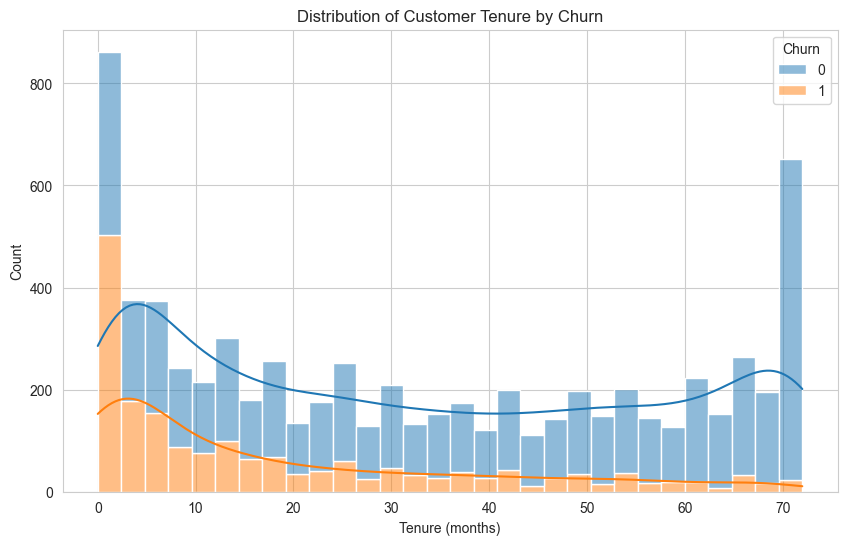

In [11]:
#Tenure
sns.histplot(data=cleaned_df, x='tenure', hue='Churn', bins=30, kde=True , multiple='stack')
plt.title("Distribution of Customer Tenure by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

1. Observing the LEFT side (low tenure) of this histplot
Many churned customers i.e yellow bar(Churn = 1) are clustered at low tenure (0–12 months)
This means:
Customers are most likely to churn early i.e after spending a short time using the services meaning ew customers are at the highest risk of churn.

2. Observing the RIGHT side (high tenure)
As tenure increases, the non-churned customers  i.e blue bar(Churn = 0) dominate.
Very few churned customers remain at high tenure (50+ months) meaning the longer a customer stays, the less likely they are to churn.

3. Observing the shape of the KDE curves
The churn curve peaks early and drops quickly.
The non-churn curve spreads across higher tenure values.
Meaning churn probability decreases as tenure increases thereby indicating a negative relationship.

From this single plot, we can confidently say:
Customer churn is strongly associated with tenure. Customers are significantly more likely to churn within the first few months of service, while long-tenured customers show much higher retention. This suggests that early stage customer experience and onboarding are critical levers for churn reduction.

And it is recommended that based on this plot alone:
The Company should:
-Focus retention strategies on new customers
-Improve onboarding and early customer support
-Give about first 3–6 months incentives
-Introduce early warning churn models for low-tenure users

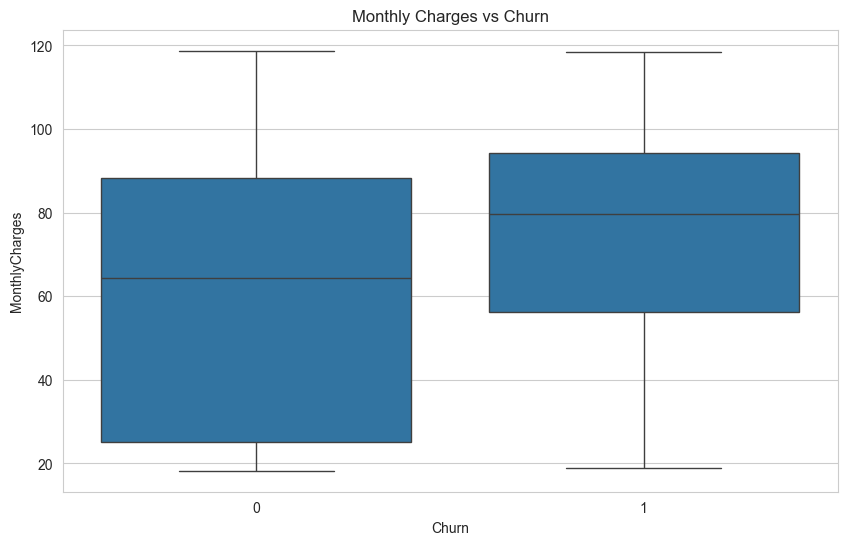

In [12]:
#For monthly charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=cleaned_df)
plt.title("Monthly Charges vs Churn") 
plt.show()

* Observing the medians(middle lines) of both boxplots for Churned and Non Churned we can see that the monthly charges for churned customers are higher(around 80) while for non churned customers is around 64 or so meaning the monthly charges plays definetely a role in the reason for customer churning as customers who churn tend to pay higher monthly charges.

* Also obsrving the Quartile ranges of price you can see that for churned customers the spread is around higher prices where 25% of customers pays below 57 and 75% pays below 95 showing that the churned customers have a wider spread toward high charges and Non-churned customers are more concentrated at lower charges as 75% of them (non churned) pays even less than 80

* in general it can be infered that monthly charges contribute greatly to customer churnings most especially as the boxes do not relly over lap

Actionable recommendations based on monthly charges include:
- Target high MonthlyCharges customers with discounts,bundles and loyalty rewards
- Review pricing for fiber/internet-heavy plans
- Monitor price hikes closely

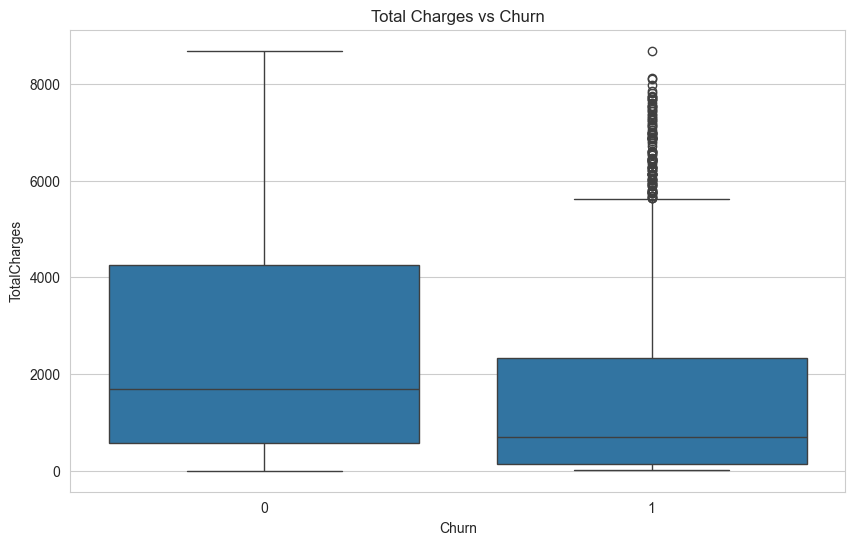

In [13]:
#Total CHarges
sns.boxplot(x='Churn', y='TotalCharges', data=cleaned_df)
plt.title("Total Charges vs Churn")
plt.show()

# The TotalCharges box plot slightly contradicts the monthly charges as the median price (middle line ) for churned customer on totalcharges is lower that at monthly charges,this is due to tenure  since we already established above that churned customer leaves early making their total charges lower than otal charges of non chyrned customers since totalcharges = monthlycharges * tenure.

# So we can say that while churned customers tend to have higher monthly charges, they exhibit lower total charges due to significantly shorter tenure. This highlights tenure as a dominant driver of total revenue and reinforces early churn as a major business risk

In [14]:
cleaned_df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Now Carrying Out EDA For Categoricals Columns


Partner_Yes vs Churn:
 Churn                0          1
Partner_Yes                      
0            67.042021  32.957979
1            80.335097  19.664903


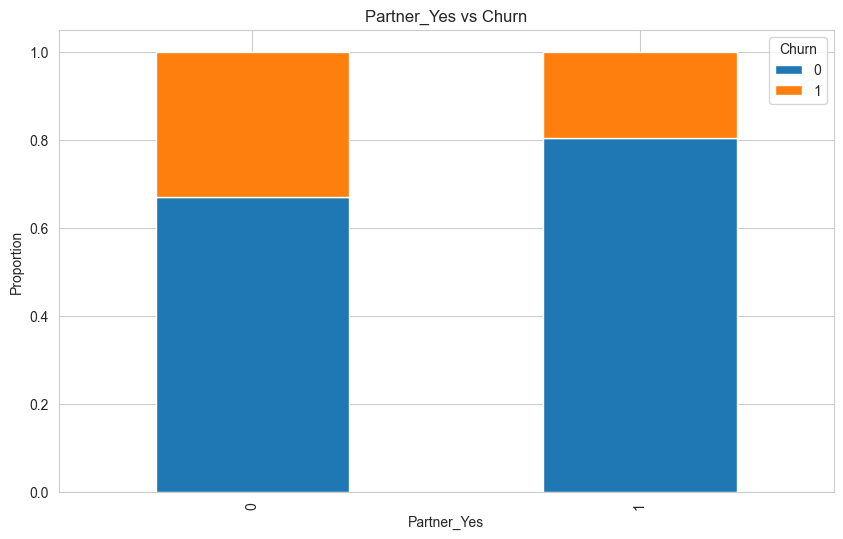


Dependents_Yes vs Churn:
 Churn                   0          1
Dependents_Yes                      
0               68.720860  31.279140
1               84.549763  15.450237


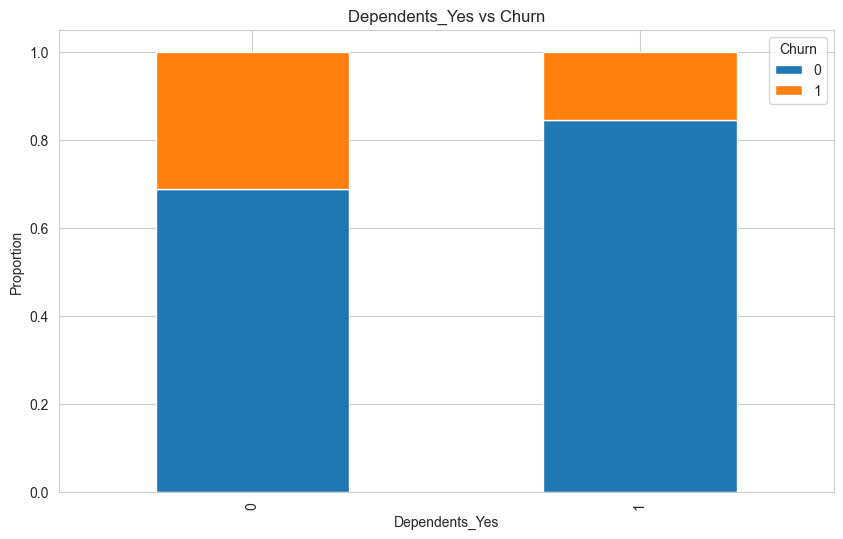


PhoneService_Yes vs Churn:
 Churn                     0          1
PhoneService_Yes                      
0                 75.073314  24.926686
1                 73.290363  26.709637


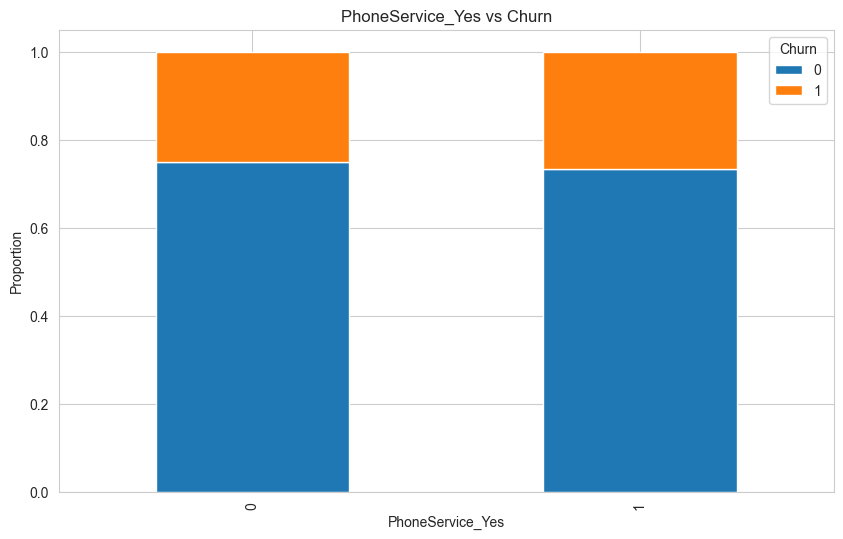


MultipleLines_No phone service vs Churn:
 Churn                                   0          1
MultipleLines_No phone service                      
0                               73.290363  26.709637
1                               75.073314  24.926686


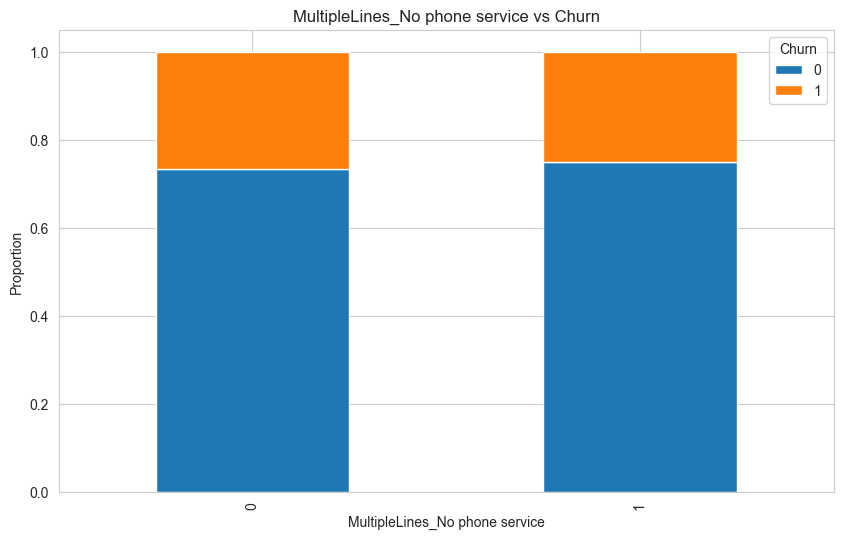


MultipleLines_Yes vs Churn:
 Churn                      0          1
MultipleLines_Yes                      
0                  74.975442  25.024558
1                  71.390104  28.609896


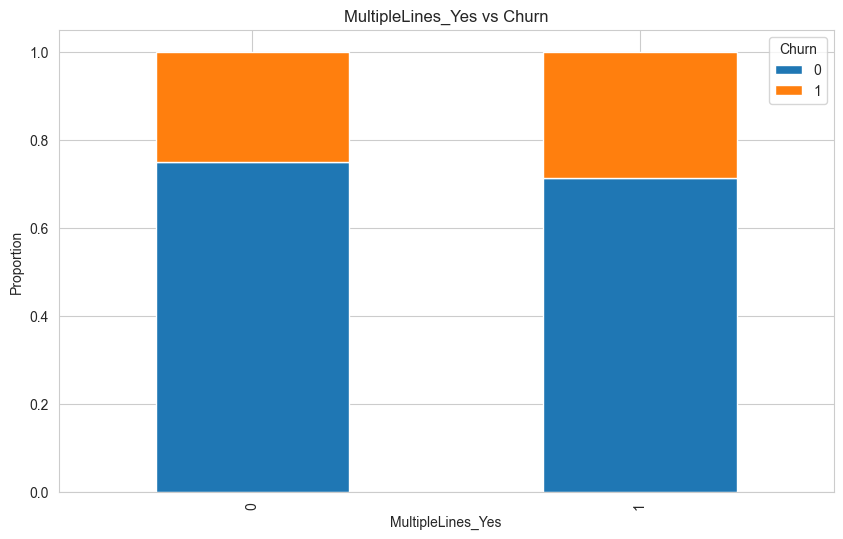

In [15]:
categorical_features_1 = [
    'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes'
]

for col in categorical_features_1:
    ct = pd.crosstab(cleaned_df[col], cleaned_df['Churn'], normalize='index')
    print(f"\n{col} vs Churn:\n", ct*100)
    ct.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()


gender_Male vs Churn:
 Churn                0          1
gender_Male                      
0            73.079128  26.920872
1            73.839662  26.160338


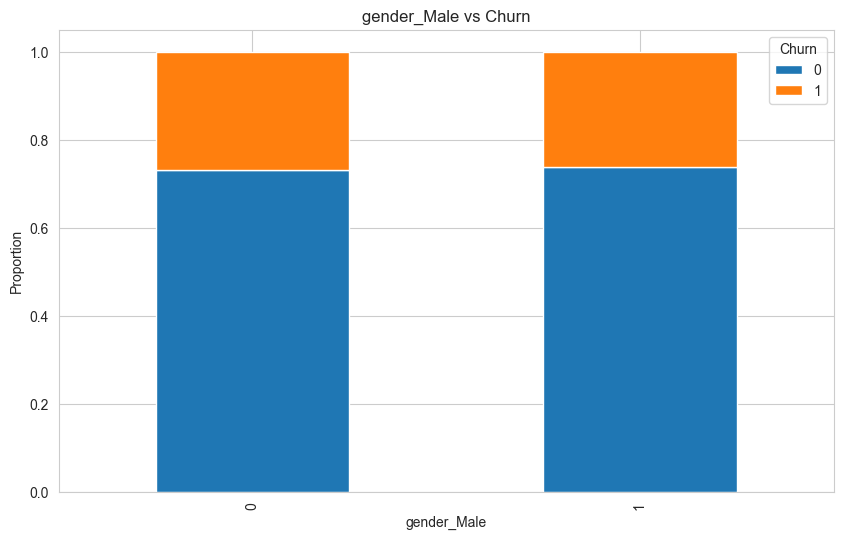


InternetService_Fiber optic vs Churn:
 Churn                                0          1
InternetService_Fiber optic                      
0                            85.507981  14.492019
1                            58.107235  41.892765


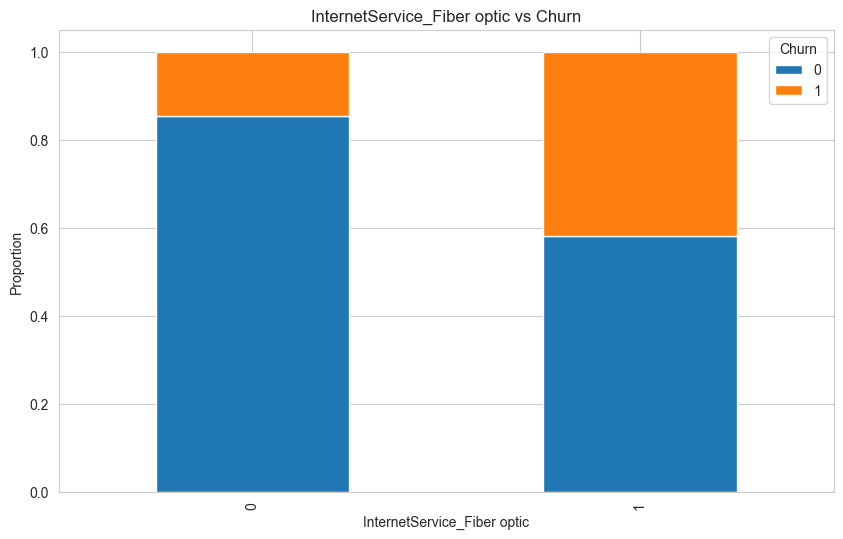


InternetService_No vs Churn:
 Churn                       0          1
InternetService_No                      
0                   68.171107  31.828893
1                   92.595020   7.404980


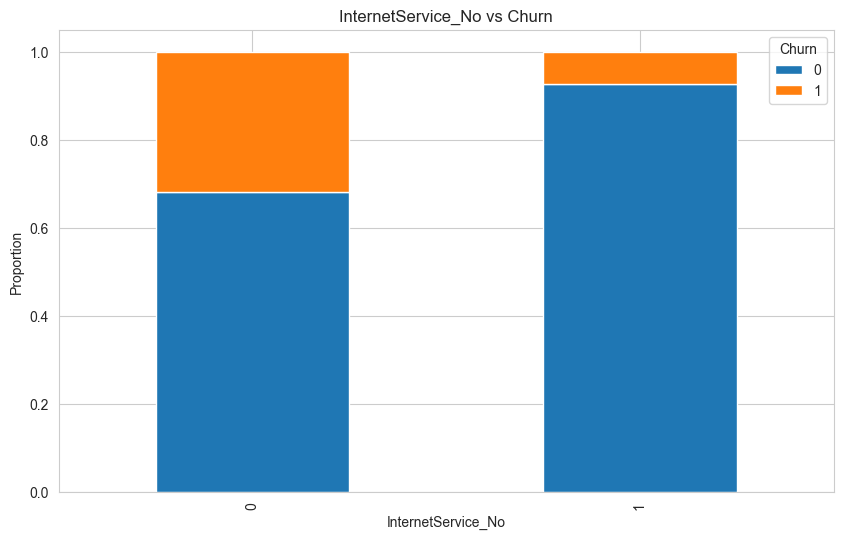


OnlineSecurity_No internet service vs Churn:
 Churn                                       0          1
OnlineSecurity_No internet service                      
0                                   68.171107  31.828893
1                                   92.595020   7.404980


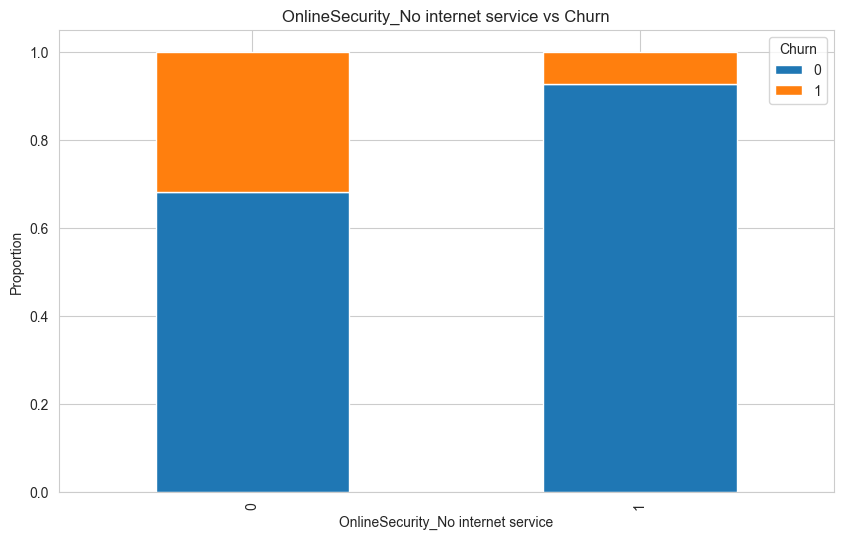


OnlineSecurity_Yes vs Churn:
 Churn                       0          1
OnlineSecurity_Yes                      
0                   68.670382  31.329618
1                   85.388806  14.611194


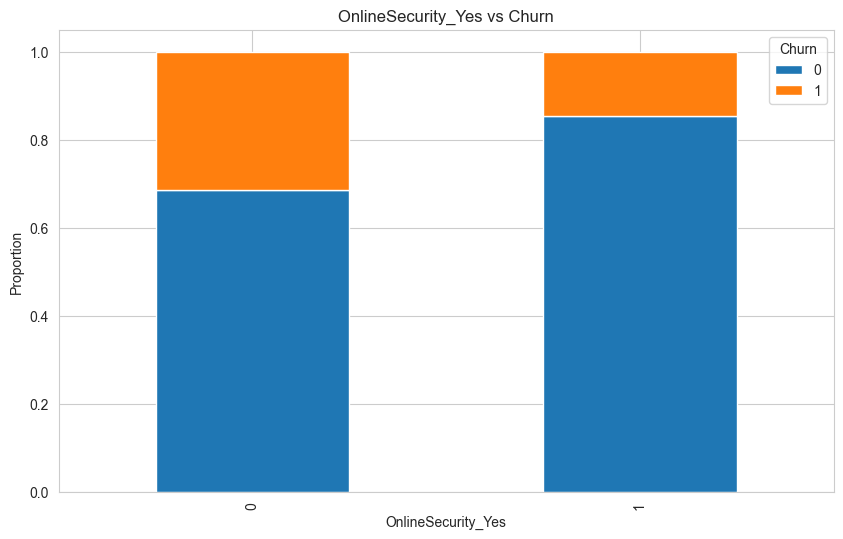

In [16]:
categorical_features_2 = [
    'gender_Male' , 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes']

for col in categorical_features_2:
    ct = pd.crosstab(cleaned_df[col], cleaned_df['Churn'], normalize='index')
    print(f"\n{col} vs Churn:\n", ct*100)
    ct.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()


OnlineBackup_No internet service vs Churn:
 Churn                                     0          1
OnlineBackup_No internet service                      
0                                 68.171107  31.828893
1                                 92.595020   7.404980


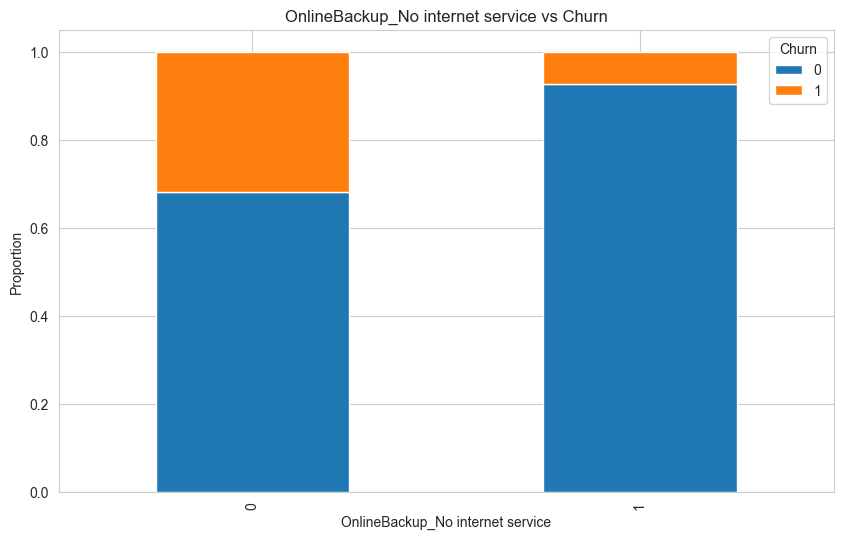


OnlineBackup_Yes vs Churn:
 Churn                     0          1
OnlineBackup_Yes                      
0                 70.827915  29.172085
1                 78.468506  21.531494


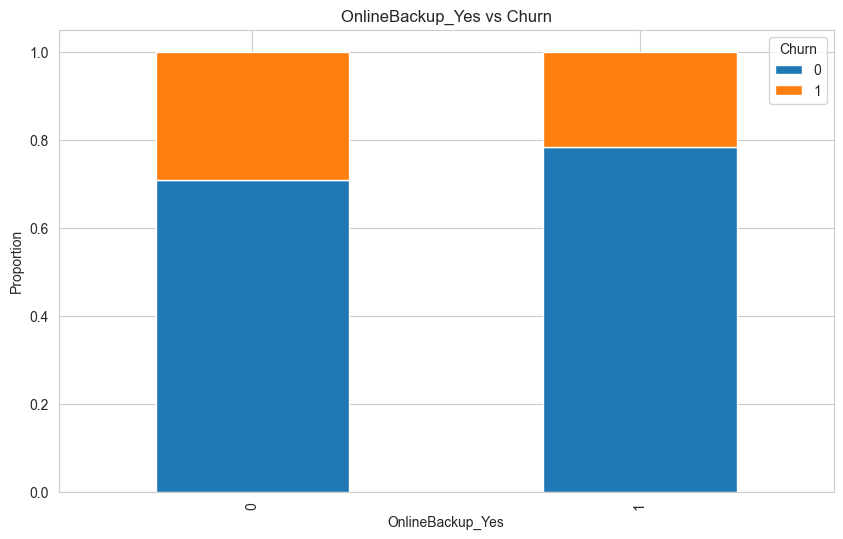


DeviceProtection_No internet service vs Churn:
 Churn                                         0          1
DeviceProtection_No internet service                      
0                                     68.171107  31.828893
1                                     92.595020   7.404980


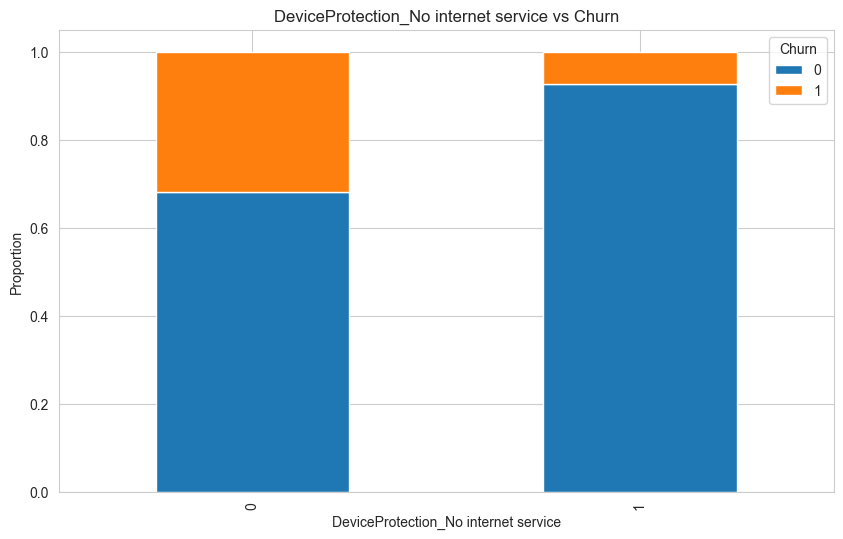


DeviceProtection_Yes vs Churn:
 Churn                         0          1
DeviceProtection_Yes                      
0                     71.348193  28.651807
1                     77.497936  22.502064


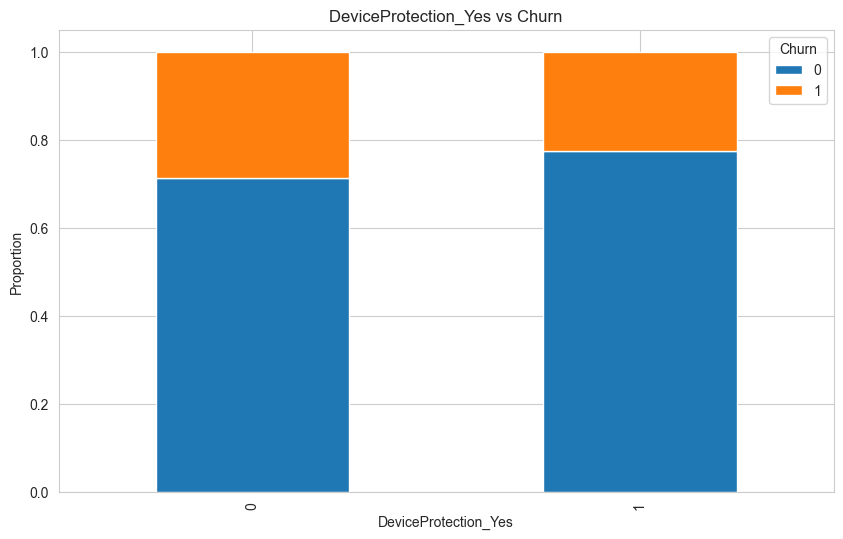


TechSupport_No internet service vs Churn:
 Churn                                    0          1
TechSupport_No internet service                      
0                                68.171107  31.828893
1                                92.595020   7.404980


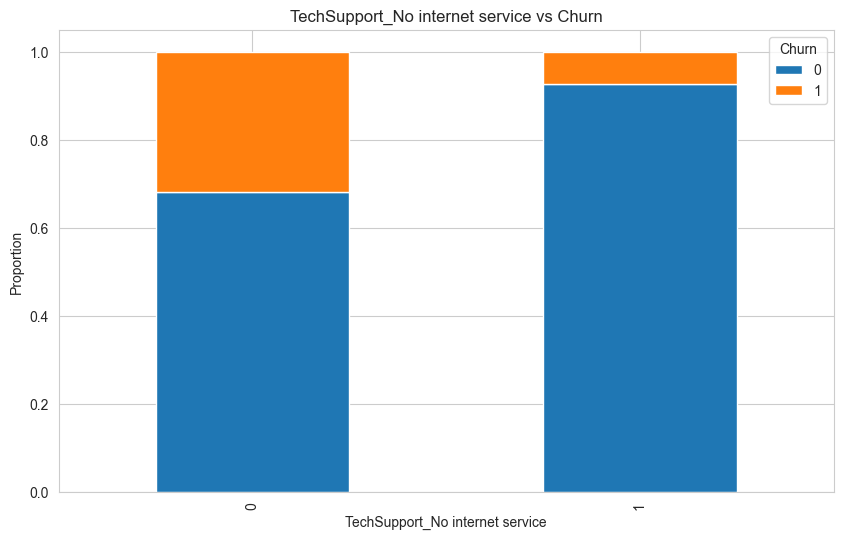

In [17]:
categorical_features_3 = [
    'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service']

for col in categorical_features_3:
    ct = pd.crosstab(cleaned_df[col], cleaned_df['Churn'], normalize='index')
    print(f"\n{col} vs Churn:\n", ct*100)
    ct.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()


TechSupport_Yes vs Churn:
 Churn                    0          1
TechSupport_Yes                      
0                68.813763  31.186237
1                84.833659  15.166341


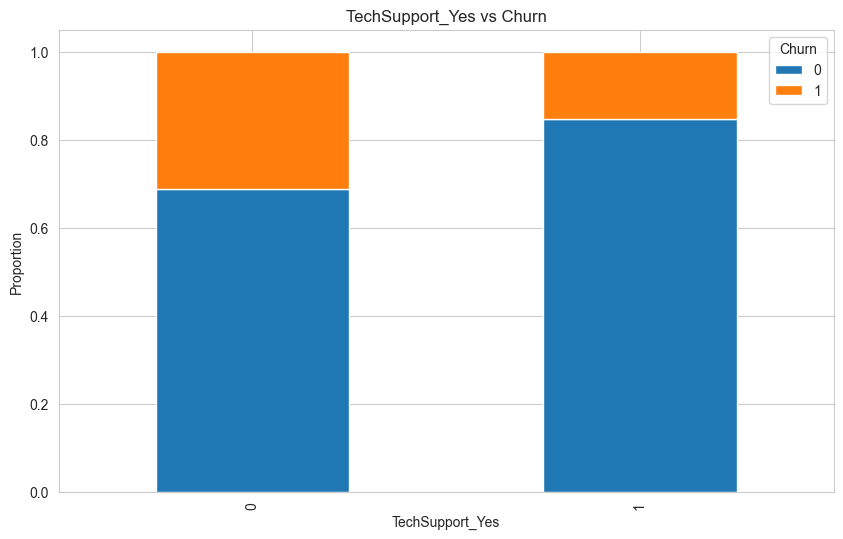


StreamingTV_No internet service vs Churn:
 Churn                                    0          1
StreamingTV_No internet service                      
0                                68.171107  31.828893
1                                92.595020   7.404980


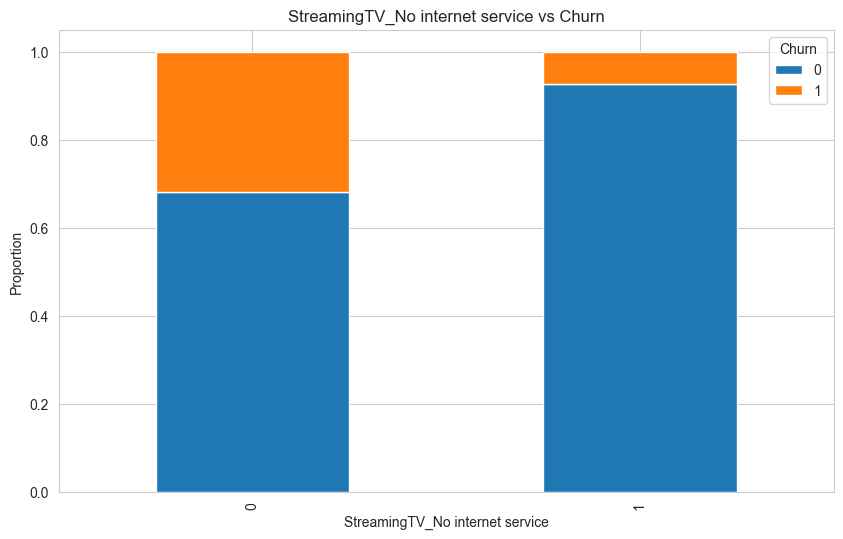


StreamingTV_Yes vs Churn:
 Churn                    0          1
StreamingTV_Yes                      
0                75.668819  24.331181
1                69.929812  30.070188


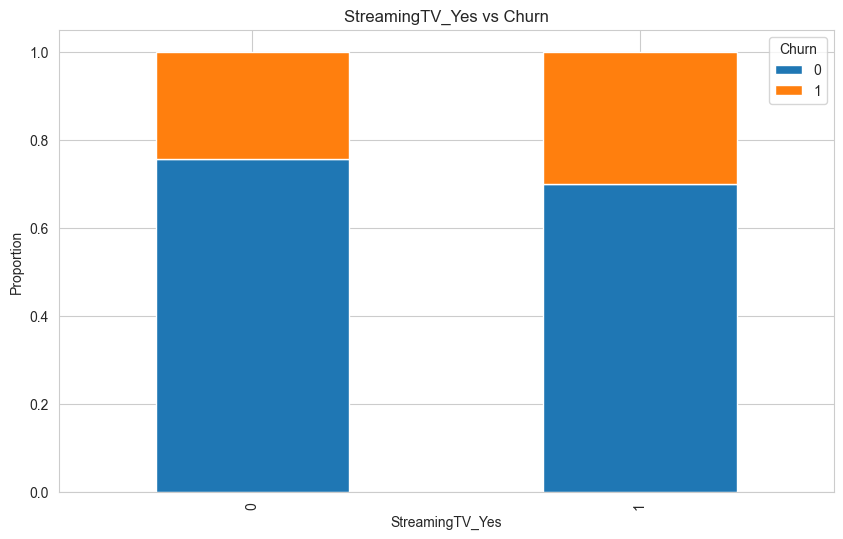


StreamingMovies_No internet service vs Churn:
 Churn                                        0          1
StreamingMovies_No internet service                      
0                                    68.171107  31.828893
1                                    92.595020   7.404980


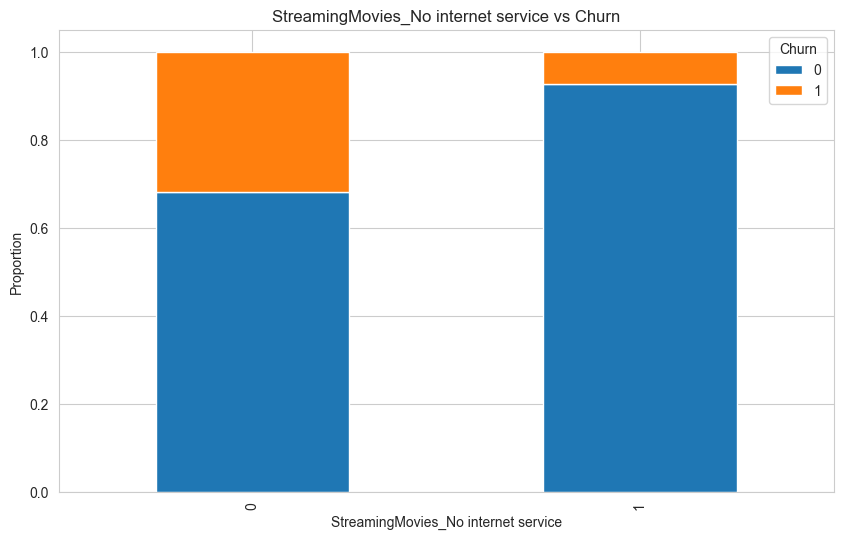


StreamingMovies_Yes vs Churn:
 Churn                        0          1
StreamingMovies_Yes                      
0                    75.620506  24.379494
1                    70.058565  29.941435


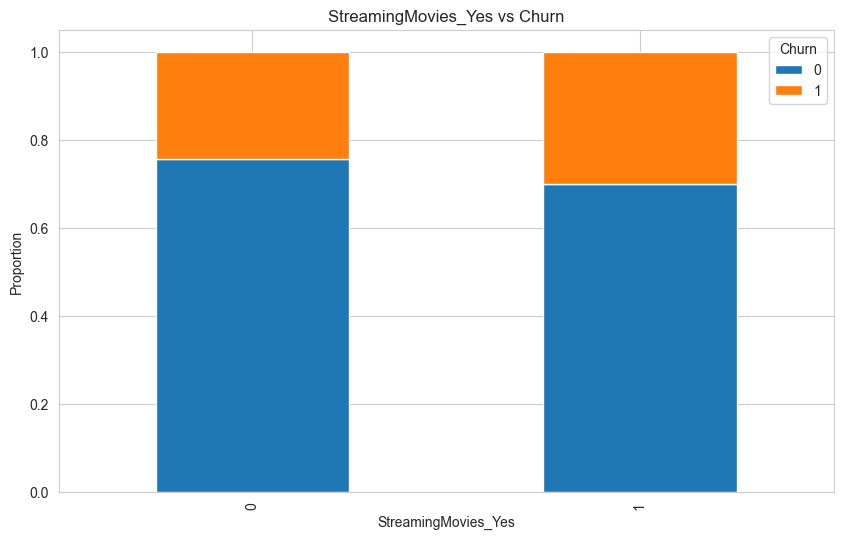


Contract_One year vs Churn:
 Churn                      0          1
Contract_One year                      
0                  69.425494  30.574506
1                  88.730482  11.269518


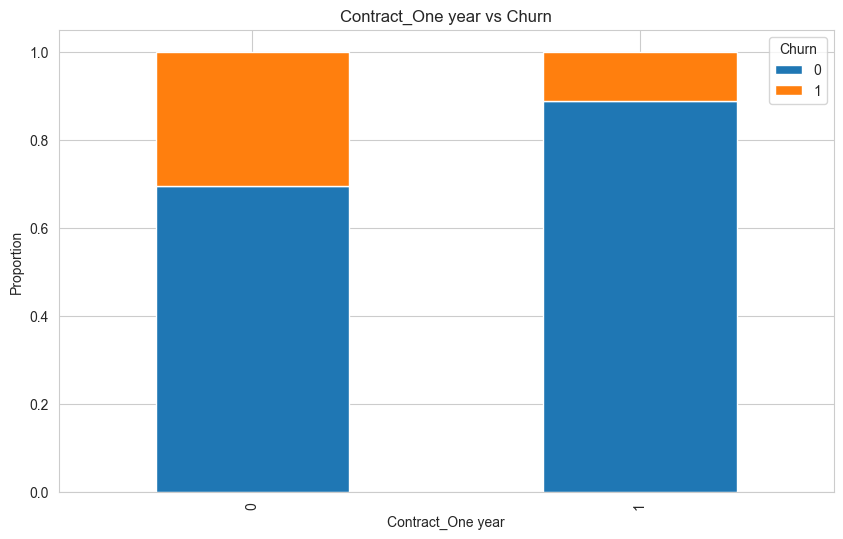


Contract_Two year vs Churn:
 Churn                      0          1
Contract_Two year                      
0                  65.949888  34.050112
1                  97.168142   2.831858


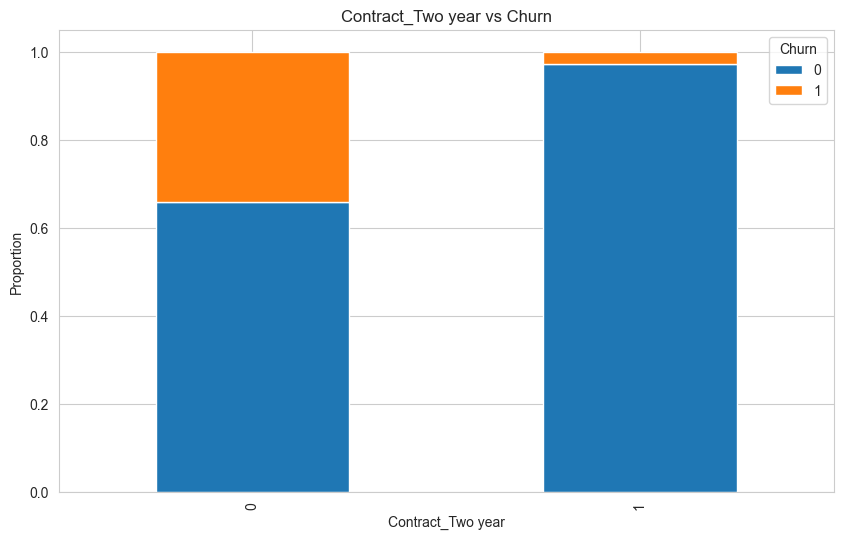


PaperlessBilling_Yes vs Churn:
 Churn                         0          1
PaperlessBilling_Yes                      
0                     83.669916  16.330084
1                     66.434908  33.565092


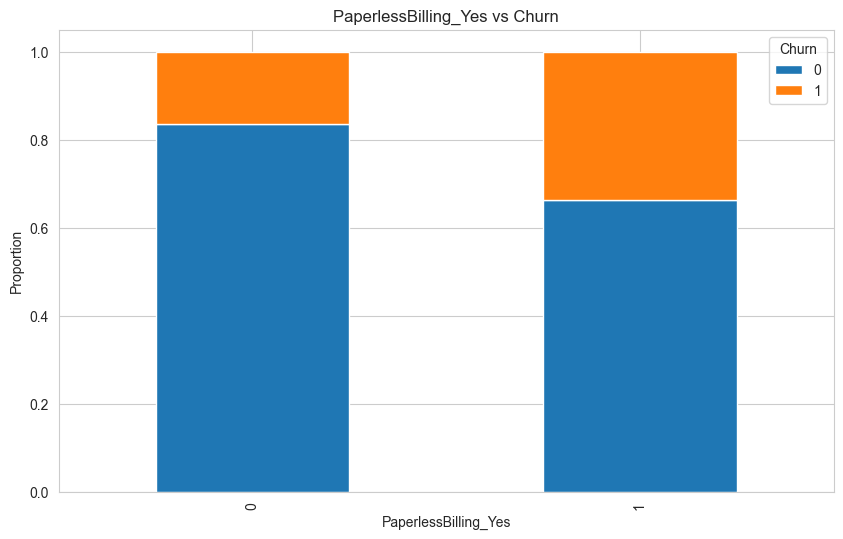


PaymentMethod_Credit card (automatic) vs Churn:
 Churn                                          0          1
PaymentMethod_Credit card (automatic)                      
0                                      70.349574  29.650426
1                                      84.756899  15.243101


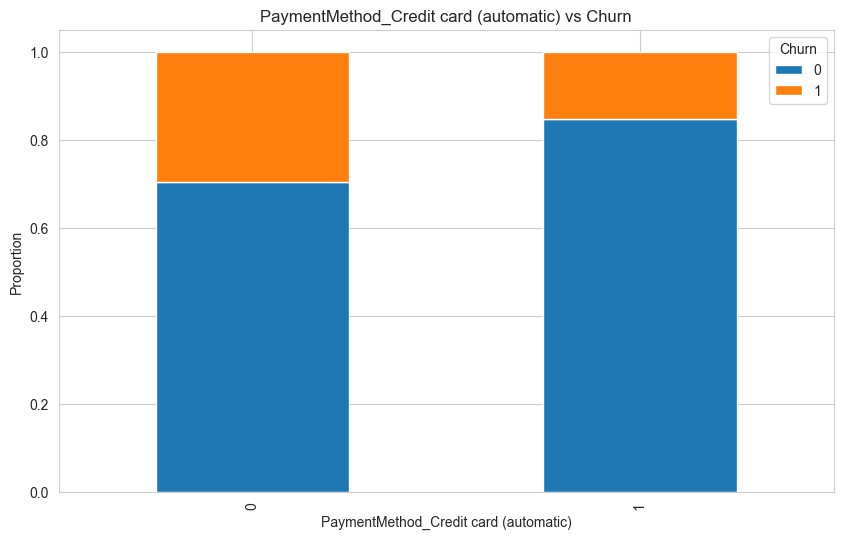


PaymentMethod_Electronic check vs Churn:
 Churn                                   0          1
PaymentMethod_Electronic check                      
0                               82.941428  17.058572
1                               54.714588  45.285412


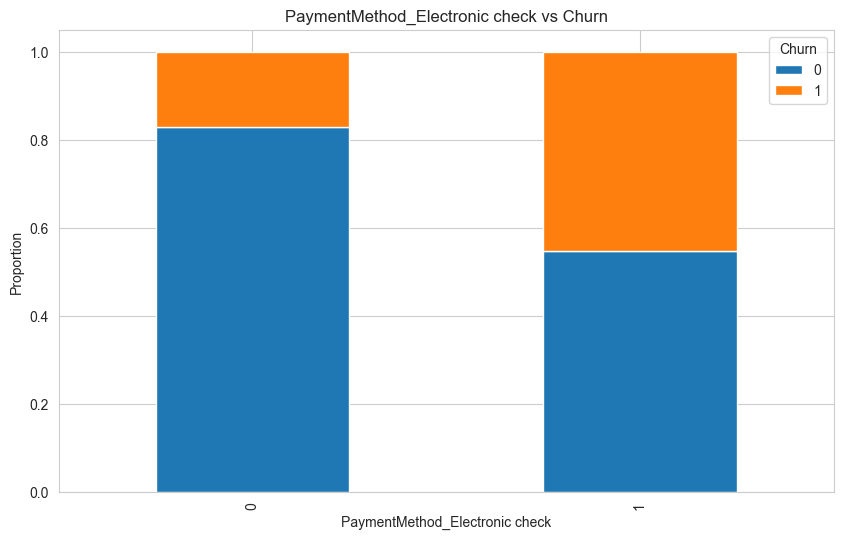


PaymentMethod_Mailed check vs Churn:
 Churn                               0          1
PaymentMethod_Mailed check                      
0                           71.257595  28.742405
1                           80.893300  19.106700


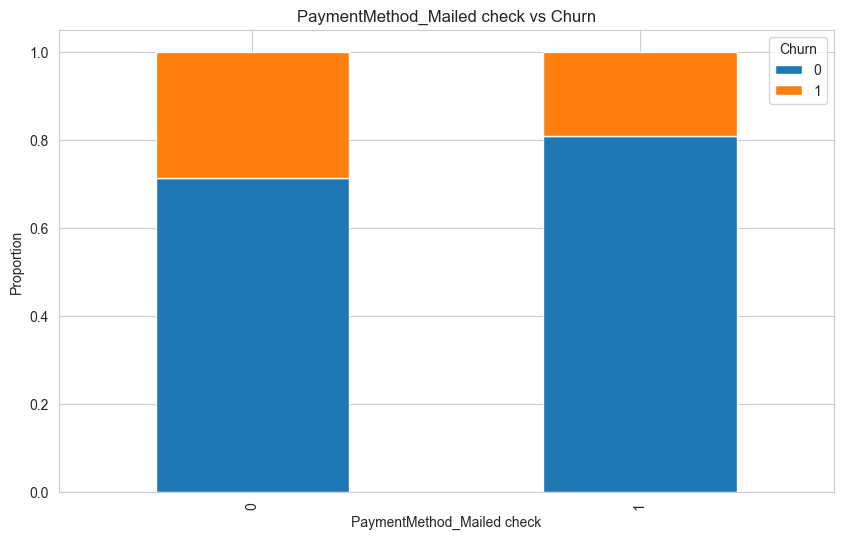

In [18]:
categorical_features_4 = [
   'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for col in categorical_features_4:
    ct = pd.crosstab(cleaned_df[col], cleaned_df['Churn'], normalize='index')
    print(f"\n{col} vs Churn:\n", ct*100)
    ct.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()

# Correlation Analysis

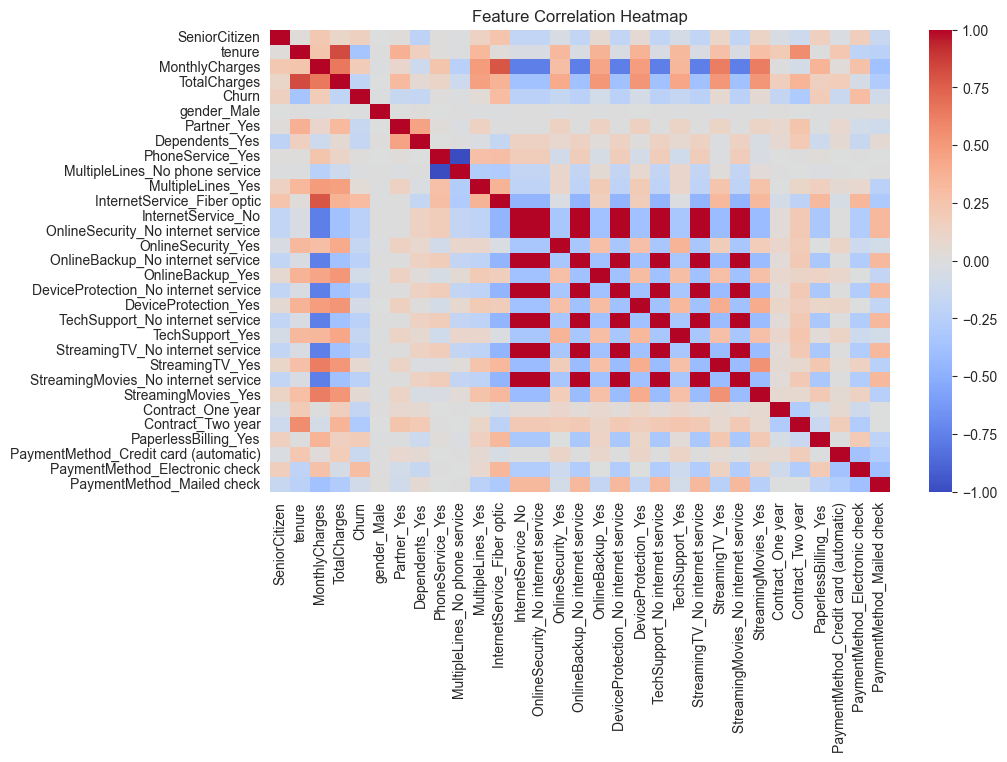

In [20]:
corr = cleaned_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
#Getting the top correlated columns
# Dropping customer ID
corr_df = cleaned_df.drop(columns=['customerID'])
# Keep only numeric columns
corr_df = corr_df.select_dtypes(include=['int64', 'float64'])
corr_df


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
corr_matrix = corr_df.corr()
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
churn_corr = churn_corr.drop('Churn')
churn_corr

InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One year                       -0.177820


In [24]:
top_positive = churn_corr.head(10)
top_positive

InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling_Yes              0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService_Yes                  0.011942
gender_Male                      -0.008612
Name: Churn, dtype: float64

* These are the top 10 features that correlates more with the Churn charateristics of customers where
Positive → increases likelihood of churn

Negative → reduces likelihood of churn

Closer to 0 → weak or no relationship with churn behaviour

Most strongest realtions are the InternetService_Fiber optic  & PaymentMethod_Electronic check features while moderate are the MonthlyCharges,PaperlessBilling_Yes and the SeniorCitizen while weak correlation exists between churn and tge (StreamingTV_Yes , StreamingMovies_Yes , MultipleLines_Yes  and PhoneService_Yes) features while there is likely no correlation between the churn and the gender column